In [2]:
import pandas as pd
df = pd.read_csv('concatenated_reviews.csv')

In [3]:
# check for duplicates in id column
df['id'].duplicated().sum()

13

In [4]:
# list the duplicate ids
df[df['id'].duplicated()]['id']

616    R2YFM3DW9ZPKAV
626    R2RXKVD3AWSP2L
630    R3CLJT1O2XDK28
633    R1SU9GHKMF2PXN
635    R1PXSZE8MH4HCZ
638    R2J2XFTAAEL50V
641    R1MXD3GZKHTAKE
642    R33O38DNX0P4DD
880     R4P0HPOPSRECI
881    R366Y3EP4BFRMK
882     RUPX3V2E7K6B8
883     R5DM8A2UO2Z9N
884    R3SGPS32AFOG6R
Name: id, dtype: object

In [5]:
# drop duplicates
df.drop_duplicates(subset='id', inplace=True)

In [6]:
# view id R2YFM3DW9ZPKAV to see if it was dropped
df[df['id'] == 'R2YFM3DW9ZPKAV']

,id,title,body,asin,body_html,link,rating,vine_program,verified_purchase,helpful_votes,...,date.raw,date.utc,profile.name,profile.link,profile.id,profile.image,images,videos,attributes,attributes_flat
66,R2YFM3DW9ZPKAV,Good activity book,Cute pictures and great quality book,0593385691,<span>Cute pictures and great quality book</span>,https://www.amazon.ca/gp/customer-reviews/R2YF...,5,False,True,NaN,...,"Reviewed in Canada on March 26, 2024",2024-03-26T00:00:00.000Z,Magskywei,https://www.amazon.ca/gp/profile/amzn1.account...,AEB3ND3DRYZCTFEJK6YAX6UTB5HA,NaN,NaN,NaN,NaN,NaN


In [7]:
# check for null values in body column
df['body'].isnull().sum()

1

In [8]:
#check for null values in title column
df['title'].isnull().sum()

0

In [9]:
df['title_body'] = df['title'] + ' ' + df['body']

In [10]:
df.head(1)

,id,title,body,asin,body_html,link,rating,vine_program,verified_purchase,helpful_votes,...,date.utc,profile.name,profile.link,profile.id,profile.image,images,videos,attributes,attributes_flat,title_body
0,R3PJTWSPOOO4B4,Financial intelligence,"Great, great read. Very insightful and easy to...",0857197681,"<span>Great, great read. Very insightful and e...",https://www.amazon.ca/gp/customer-reviews/R3PJ...,5,False,True,2.0,...,2024-05-18T00:00:00.000Z,Peter A.,https://www.amazon.ca/gp/profile/amzn1.account...,AF3QM6IZQ64YQIDLQZ7WDVK6WQAA,NaN,NaN,NaN,NaN,NaN,"Financial intelligence Great, great read. Very..."


In [11]:
# string
docs = df['title_body'].astype(str)

In [12]:
# merge all documents into one string
all_docs = ' '.join(docs)

Preprocess Text Data using the NLTK (Natural Language Toolkit)

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [14]:
# download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grahammarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grahammarsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# lowercase all words
all_docs = all_docs.lower()

In [16]:
# tokenize all words
tokens = word_tokenize(all_docs)

In [17]:
# remove punctuation
tokens = [word for word in tokens if word.isalpha()]

In [18]:
# remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

In [19]:
print(tokens[:10])

['financial', 'intelligence', 'great', 'great', 'read', 'insightful', 'easy', 'understand', 'author', 'unique']


In [20]:
# lemmatize words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

print(tokens[:10])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/grahammarsh/nltk_data...


[nltk_data]   Package wordnet is already up-to-date!


['financial', 'intelligence', 'great', 'great', 'read', 'insightful', 'easy', 'understand', 'author', 'unique']


In [21]:
from gensim import corpora, models

In [22]:
dictionary = corpora.Dictionary([tokens])

In [23]:
corpus = [dictionary.doc2bow(token) for token in [tokens]]

Optimal Topic 

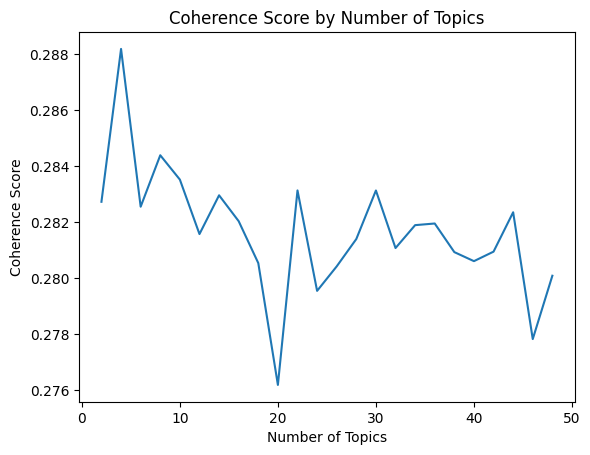

In [36]:
# determine the number of topics
coherence_scores = []
for i in range(2, 50, 2):
    lda_model = models.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = models.CoherenceModel(model=lda_model, texts=[tokens], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

import matplotlib.pyplot as plt

plt.plot(range(2, 50, 2), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score by Number of Topics')
plt.show()

Model

In [25]:
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [26]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.000*"book" + 0.000*"love" + 0.000*"like" + 0.000*"time" + 0.000*"read"')
(1, '0.000*"book" + 0.000*"read" + 0.000*"love" + 0.000*"like" + 0.000*"story"')
(2, '0.034*"book" + 0.012*"read" + 0.009*"love" + 0.008*"like" + 0.008*"character"')
(3, '0.000*"book" + 0.000*"read" + 0.000*"love" + 0.000*"one" + 0.000*"like"')
(4, '0.002*"book" + 0.001*"read" + 0.001*"character" + 0.001*"love" + 0.001*"one"')
(5, '0.001*"book" + 0.000*"read" + 0.000*"like" + 0.000*"love" + 0.000*"story"')
(6, '0.001*"book" + 0.000*"love" + 0.000*"read" + 0.000*"character" + 0.000*"like"')
(7, '0.001*"book" + 0.000*"love" + 0.000*"read" + 0.000*"like" + 0.000*"character"')
(8, '0.000*"book" + 0.000*"read" + 0.000*"love" + 0.000*"good" + 0.000*"story"')
(9, '0.000*"book" + 0.000*"read" + 0.000*"love" + 0.000*"like" + 0.000*"one"')


Visualization

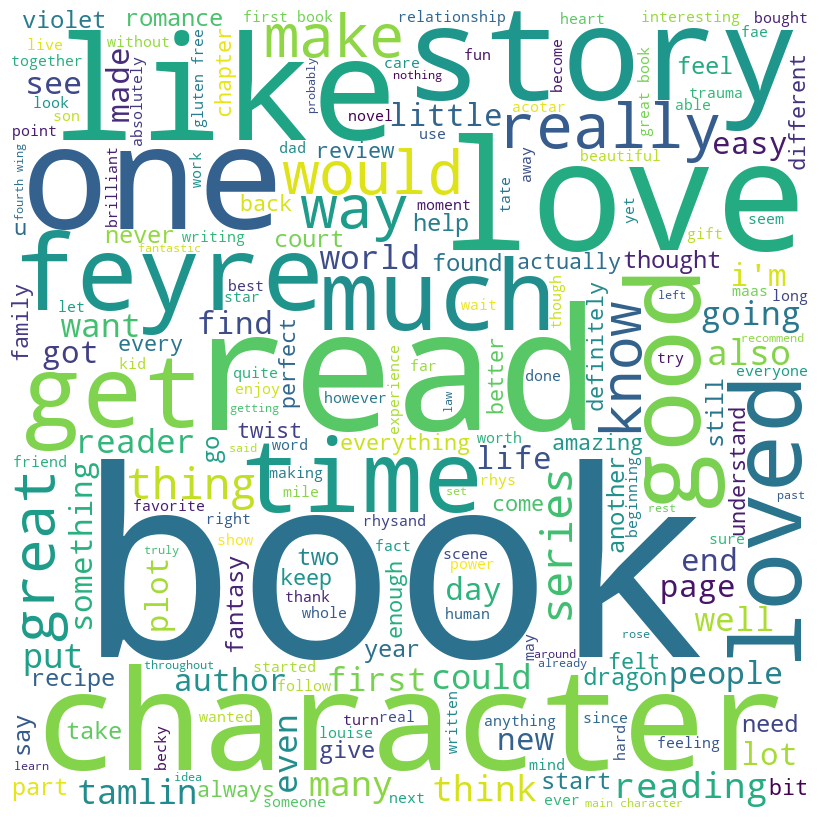

In [27]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_docs)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [28]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=64495) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=64495) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=64495) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=64495) is multi-threaded, use of fork() may lead to deadlocks 

In [29]:
# coherence score
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=[tokens], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2769669152629735


In [30]:
# perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -7.779936540588689


In [31]:
# how can we improve the model?
# 1. increase the number of passes
# 2. increase the number of topics
# 3. increase the number of words per topic
# 4. increase the number of documents
# 5. increase the number of words per document
# 6. increase the number of words per topic
# 7. increase the number of words per document
# 8. increase the number of words per topic

# let's try increasing the number of topics


In [32]:
from collections import Counter

# Count the frequency of each term in the list of tokens
term_frequencies = Counter(tokens)

# Print the 30 most common terms
for term, frequency in term_frequencies.most_common(30):
    print(f'Term: {term}, Frequency: {frequency}')

Term: book, Frequency: 1674
Term: read, Frequency: 571
Term: love, Frequency: 459
Term: like, Frequency: 391
Term: character, Frequency: 373
Term: one, Frequency: 339
Term: story, Frequency: 319
Term: great, Frequency: 265
Term: time, Frequency: 263
Term: good, Frequency: 260
Term: really, Frequency: 248
Term: get, Frequency: 239
Term: would, Frequency: 234
Term: feyre, Frequency: 234
Term: loved, Frequency: 223
Term: much, Frequency: 215
Term: way, Frequency: 213
Term: first, Frequency: 206
Term: make, Frequency: 191
Term: series, Frequency: 189
Term: could, Frequency: 186
Term: reading, Frequency: 175
Term: many, Frequency: 169
Term: know, Frequency: 169
Term: thing, Frequency: 166
Term: well, Frequency: 164
Term: even, Frequency: 164
Term: also, Frequency: 155
Term: think, Frequency: 151
Term: world, Frequency: 146


In [33]:
# print the 30 most common terms in a list
term_frequencies.most_common(30)

[('book', 1674),
 ('read', 571),
 ('love', 459),
 ('like', 391),
 ('character', 373),
 ('one', 339),
 ('story', 319),
 ('great', 265),
 ('time', 263),
 ('good', 260),
 ('really', 248),
 ('get', 239),
 ('would', 234),
 ('feyre', 234),
 ('loved', 223),
 ('much', 215),
 ('way', 213),
 ('first', 206),
 ('make', 191),
 ('series', 189),
 ('could', 186),
 ('reading', 175),
 ('many', 169),
 ('know', 169),
 ('thing', 166),
 ('well', 164),
 ('even', 164),
 ('also', 155),
 ('think', 151),
 ('world', 146)]

In [39]:
# pull out just the 30 most common terms
common_terms = [term for term, frequency in term_frequencies.most_common(100)]
print(common_terms)

['book', 'read', 'love', 'like', 'character', 'one', 'story', 'great', 'time', 'good', 'really', 'get', 'would', 'feyre', 'loved', 'much', 'way', 'first', 'make', 'series', 'could', 'reading', 'many', 'know', 'thing', 'well', 'even', 'also', 'think', 'world', 'life', 'tamlin', 'put', 'reader', 'want', 'people', 'day', 'court', 'going', 'page', 'easy', 'plot', 'feel', 'go', 'year', 'see', 'felt', 'new', 'little', 'end', 'find', 'made', 'got', 'something', 'lot', 'maas', 'author', 'dragon', 'every', 'written', 'romance', 'fantasy', 'recipe', 'never', 'thought', 'amazing', 'give', 'help', 'recommend', 'need', 'say', 'better', 'still', 'best', 'part', 'found', 'two', 'take', 'definitely', 'bit', 'twist', 'wait', 'start', 'violet', 'next', 'another', 'back', 'everything', 'always', 'u', 'writing', 'long', 'chapter', 'keep', 'actually', 'different', 'enjoyed', 'family', 'look', 'child']
